In [1]:
import xarray as xr
import matplotlib.pyplot as plt
# from snakemake.io import 
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
if 'snakemake' in globals():
    to_file = True
    path='./'
    files = snakemake.input.trajec_files
else:
    path = '../../../'
    to_file= False

In [4]:
dfs = []
for year in range(1999,2006):
    dfs.append( pd.read_csv(path+f'results/model_results/intermediate_results/timeseries/wetdep/wetdep.BADOE.2micron.Day.{year}.csv', index_col=0))

In [5]:
df = pd.concat(dfs)

In [6]:
df.index = pd.to_datetime(df.index)

In [ ]:
ls ../../../results/model_results/intermediate_results/timeseries/drydep

In [7]:
df_early_spring = []
for year in range(1999,2006):
    df_early_spring.append(df[f'{year}-03-06':f'{year}-04-17'])

df_late_spring = []
for year in range(1999,2006):
    df_late_spring.append(df[f'{year}-04-17':f'{year}-05-31'])


In [8]:
df_early_spring = pd.concat(df_early_spring)
df_late_spring = pd.concat(df_late_spring)

(0.0, 35.0)

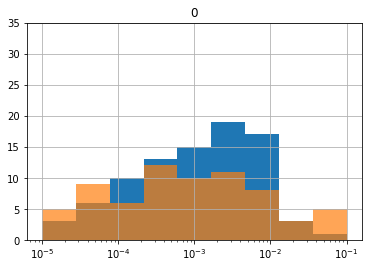

In [9]:
fig,ax = plt.subplots()
logbins = np.logspace(np.log10(1e-5),np.log10(0.1),10)
df_late_spring.where(df_late_spring>1e-5).hist(bins=logbins,ax=ax)
df_early_spring.where(df_early_spring>1e-5).hist(bins=logbins,ax=ax,alpha=0.7)

ax.semilogx()
ax.set_ylim(0,35)

In [ ]:
fig,ax = plt.subplots()

ax.semilogx()
ax.set_ylim(0,35)